In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df0=pd.read_csv('/content/drive/MyDrive/features.csv')
df1=pd.read_csv('/content/drive/MyDrive/power.csv')
df1.tail()

,Timestamp,Power(kW)
136725,2021-08-14 23:10:00,2757.728271
136726,2021-08-14 23:20:00,2758.323242
136727,2021-08-14 23:30:00,2759.243408
136728,2021-08-14 23:40:00,2761.261719
136729,2021-08-14 23:50:00,2758.593262


In [ ]:
df=df0.merge(df1, how='inner', on='Timestamp')
# df.tail(5)
df[12000:12006]  

,Timestamp,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,...,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315,Power(kW)
12000,2019-03-26 15:00:00,29.918333,30.531666,28.885000,30.395000,23.584162,31.215000,16.695858,22.000000,49.583332,...,2.113795,1.952327,2.011047,1.731741,NaN,2.881961,5.888560,1.693333,5.917824,-18.451666
12001,2019-03-26 15:10:00,31.879999,32.544998,29.955000,31.629999,23.430067,32.494999,15.542374,22.146667,50.000000,...,0.246897,0.000000,0.089877,-0.336773,NaN,16.420889,5.877352,1.000000,5.914578,3.318333
12002,2019-03-26 15:20:00,33.465000,34.231667,30.971666,32.645000,34.952438,33.439999,16.834276,23.000000,50.000000,...,0.246897,0.000000,0.089877,-0.336773,NaN,30.092041,5.865854,1.000000,5.910227,46.506668
12003,2019-03-26 15:30:00,36.508335,37.246666,32.570000,34.090000,55.998398,35.291668,27.663843,23.000000,50.000000,...,0.246897,0.000000,0.089877,-0.336773,NaN,18.401083,5.857502,1.000000,5.895942,172.866669
12004,2019-03-26 15:40:00,39.091667,40.398335,34.491665,36.173332,50.702705,37.693333,31.757063,23.756666,50.360001,...,0.246897,0.000000,0.089877,-0.336773,NaN,28.505899,5.822761,1.000000,5.866086,363.533325
12005,2019-03-26 15:50:00,42.436668,42.983334,36.696667,38.953335,47.086731,40.598331,25.574389,25.056667,51.000000,...,0.246897,0.000000,0.089877,-0.336773,NaN,7.393946,5.804494,1.000000,5.836015,551.455017


In [ ]:
df.isnull().sum()

Timestamp                                             0
Gearbox_T1_High_Speed_Shaft_Temperature            3951
Gearbox_T3_High_Speed_Shaft_Temperature            4292
Gearbox_T1_Intermediate_Speed_Shaft_Temperature    3664
Temperature Gearbox Bearing Hollow Shaft           3264
                                                   ... 
Moment Q Filltered                                 4611
Proxy Sensor_Degree-45                             3536
Turbine State                                      3536
Proxy Sensor_Degree-315                            4058
Power(kW)                                             0
Length: 78, dtype: int64

In [ ]:
df2=df[:200]
df2.mean(axis = 0, skipna = True)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Gearbox_T1_High_Speed_Shaft_Temperature              60.372158
Gearbox_T3_High_Speed_Shaft_Temperature              62.701642
Gearbox_T1_Intermediate_Speed_Shaft_Temperature      55.792733
Temperature Gearbox Bearing Hollow Shaft             60.353133
Tower Acceleration Normal                            59.286621
                                                      ...     
Moment Q Filltered                                  -27.646304
Proxy Sensor_Degree-45                                5.735477
Turbine State                                         1.044883
Proxy Sensor_Degree-315                               5.752687
Power(kW)                                          1512.471769
Length: 77, dtype: float64

In [ ]:
sum([True for idx,row in df.iterrows() if any(row.isnull())])

121146

In [ ]:

df.fillna(df[:100].mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
df.isnull().sum()

Timestamp                                          0
Gearbox_T1_High_Speed_Shaft_Temperature            0
Gearbox_T3_High_Speed_Shaft_Temperature            0
Gearbox_T1_Intermediate_Speed_Shaft_Temperature    0
Temperature Gearbox Bearing Hollow Shaft           0
                                                  ..
Moment Q Filltered                                 0
Proxy Sensor_Degree-45                             0
Turbine State                                      0
Proxy Sensor_Degree-315                            0
Power(kW)                                          0
Length: 78, dtype: int64

In [ ]:
df.index = pd.to_datetime(df['Timestamp'], format='%Y.%m.%d %H:%M:%S')
df[:26]


,Timestamp,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,...,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315,Power(kW)
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2019-01-01 00:00:00,57.000000,59.000000,52.000000,56.158333,47.053776,57.000000,18.890772,35.000000,48.576668,...,0.267122,0.000000,0.058617,-0.325738,37.867054,39.281124,5.732657,1.0,5.779913,705.876648
2019-01-01 00:10:00,2019-01-01 00:10:00,57.693333,59.485001,52.450001,57.000000,64.969742,57.413334,28.560265,35.233334,48.000000,...,0.267122,0.000000,0.058617,-0.325738,-90.169106,-89.018669,5.813177,1.0,5.796757,884.711670
2019-01-01 00:20:00,2019-01-01 00:20:00,59.000000,60.756668,53.536667,57.775002,51.149670,58.728333,34.228813,36.000000,48.053333,...,0.267122,0.000000,0.058617,-0.325738,-88.556343,-88.422020,5.786413,1.0,5.772958,982.875000
2019-01-01 00:30:00,2019-01-01 00:30:00,59.881668,61.563332,54.413334,58.683334,58.740929,59.518333,35.593220,36.000000,48.788334,...,0.267122,0.000000,0.058617,-0.325738,-123.755341,-124.858444,5.758913,1.0,5.728393,1115.943359
2019-01-01 00:40:00,2019-01-01 00:40:00,61.290001,62.586666,55.485001,59.623333,53.264774,60.665001,38.552731,36.000000,49.000000,...,0.267612,0.000000,0.058703,-0.325443,-142.533325,-142.053543,5.724591,1.0,5.687730,1263.841675
2019-01-01 00:50:00,2019-01-01 00:50:00,62.271667,63.768333,56.645000,60.783333,60.292923,61.798332,37.036724,36.901669,49.259998,...,0.267133,0.000000,0.058635,-0.325801,10.729572,11.087207,5.634264,1.0,5.670437,1249.811646
2019-01-01 01:00:00,2019-01-01 01:00:00,63.000000,64.366669,57.256668,61.613335,55.853031,62.453335,34.380417,37.000000,50.000000,...,0.267122,0.000000,0.058617,-0.325738,93.885757,94.078407,5.608098,1.0,5.685888,1136.536621
2019-01-01 01:10:00,2019-01-01 01:10:00,62.875000,64.093330,57.783333,62.000000,51.719551,62.061668,30.221281,36.266666,50.000000,...,0.267122,0.000000,0.058617,-0.325738,117.666481,118.424843,5.653891,1.0,5.741217,966.803345
2019-01-01 01:20:00,2019-01-01 01:20:00,63.000000,64.945000,58.000000,62.000000,48.215454,63.000000,37.676083,35.005001,50.000000,...,0.267122,0.000000,0.058617,-0.325738,66.188446,67.726936,5.652575,1.0,5.716236,1091.823364


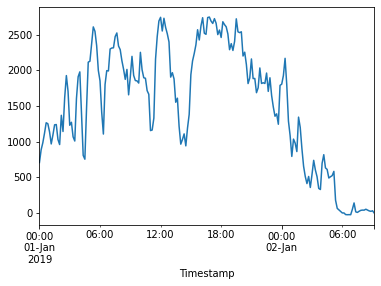

In [ ]:
dff=df[:200]
power=dff["Power(kW)"]
power.plot()

In [ ]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# results = seasonal_decompose(df['Power(kW)'])
# results.plot();

In [ ]:
dd=df[:]
powers=df["Power(kW)"]
df1.pop('Timestamp')
df=df1

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(powers, WINDOW_SIZE)
X1.shape, y1.shape

((136725, 5, 1), (136725,))

In [ ]:
X_train1, y_train1 = X1[:18000], y1[:18000]
X_val1, y_val1 = X1[18000:20000], y1[18000:20000]
X_test1, y_test1 = X1[20000:], y1[20000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((18000, 5, 1), (18000,), (2000, 5, 1), (2000,), (116725, 5, 1), (116725,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(100))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 8)                 808       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 41,617
Trainable params: 41,617
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)


model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=60, callbacks=[cp1])


Epoch 1/60
559/563 [============================>.] - ETA: 0s - loss: 2431587.7500 - root_mean_squared_error: 1559.3549

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 13s 11ms/step - loss: 2429392.0000 - root_mean_squared_error: 1558.6506 - val_loss: 364909.7500 - val_root_mean_squared_error: 604.0776
Epoch 2/60
555/563 [============================>.] - ETA: 0s - loss: 2046851.2500 - root_mean_squared_error: 1430.6821

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 6s 10ms/step - loss: 2040537.5000 - root_mean_squared_error: 1428.4738 - val_loss: 237797.3281 - val_root_mean_squared_error: 487.6447
Epoch 3/60
555/563 [============================>.] - ETA: 0s - loss: 1439065.2500 - root_mean_squared_error: 1199.6105

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 6s 11ms/step - loss: 1436348.5000 - root_mean_squared_error: 1198.4775 - val_loss: 135590.0938 - val_root_mean_squared_error: 368.2256
Epoch 4/60
553/563 [============================>.] - ETA: 0s - loss: 903966.8125 - root_mean_squared_error: 950.7717

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 6s 10ms/step - loss: 900356.1875 - root_mean_squared_error: 948.8710 - val_loss: 74412.1250 - val_root_mean_squared_error: 272.7859
Epoch 5/60
563/563 [==============================] - ETA: 0s - loss: 513377.4062 - root_mean_squared_error: 716.5036

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 6s 10ms/step - loss: 513377.4062 - root_mean_squared_error: 716.5036 - val_loss: 45192.0703 - val_root_mean_squared_error: 212.5843
Epoch 6/60
563/563 [==============================] - ETA: 0s - loss: 270718.1562 - root_mean_squared_error: 520.3058

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 6s 10ms/step - loss: 270718.1562 - root_mean_squared_error: 520.3058 - val_loss: 39079.7891 - val_root_mean_squared_error: 197.6861
Epoch 7/60
551/563 [============================>.] - ETA: 0s - loss: 159785.7188 - root_mean_squared_error: 399.7321

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 6s 10ms/step - loss: 159007.1562 - root_mean_squared_error: 398.7570 - val_loss: 35399.6094 - val_root_mean_squared_error: 188.1478
Epoch 8/60
558/563 [============================>.] - ETA: 0s - loss: 93079.9609 - root_mean_squared_error: 305.0901

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 6s 11ms/step - loss: 93055.3750 - root_mean_squared_error: 305.0498 - val_loss: 35343.5938 - val_root_mean_squared_error: 187.9989
Epoch 9/60
563/563 [==============================] - 2s 4ms/step - loss: 68298.6797 - root_mean_squared_error: 261.3401 - val_loss: 37422.2344 - val_root_mean_squared_error: 193.4483
Epoch 10/60
563/563 [==============================] - 2s 4ms/step - loss: 53828.8789 - root_mean_squared_error: 232.0105 - val_loss: 35732.5938 - val_root_mean_squared_error: 189.0307
Epoch 11/60
563/563 [==============================] - 2s 4ms/step - loss: 48463.9453 - root_mean_squared_error: 220.1453 - val_loss: 37062.3906 - val_root_mean_squared_error: 192.5159
Epoch 12/60
554/563 [============================>.] - ETA: 0s - loss: 45011.4727 - root_mean_squared_error: 212.1591

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 6s 11ms/step - loss: 44853.0469 - root_mean_squared_error: 211.7854 - val_loss: 35242.5352 - val_root_mean_squared_error: 187.7299
Epoch 13/60
563/563 [==============================] - 2s 4ms/step - loss: 46644.6992 - root_mean_squared_error: 215.9738 - val_loss: 36142.8242 - val_root_mean_squared_error: 190.1127
Epoch 14/60
563/563 [==============================] - 2s 4ms/step - loss: 44808.6914 - root_mean_squared_error: 211.6806 - val_loss: 35425.7344 - val_root_mean_squared_error: 188.2173
Epoch 15/60
563/563 [==============================] - 2s 4ms/step - loss: 44723.3086 - root_mean_squared_error: 211.4789 - val_loss: 35509.8633 - val_root_mean_squared_error: 188.4406
Epoch 16/60
563/563 [==============================] - 2s 4ms/step - loss: 45070.4297 - root_mean_squared_error: 212.2980 - val_loss: 40717.4258 - val_root_mean_squared_error: 201.7856
Epoch 17/60
563/563 [==============================] - 2s 4ms/step - loss: 45651.2734 

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 6s 10ms/step - loss: 44509.4844 - root_mean_squared_error: 210.9727 - val_loss: 34360.2656 - val_root_mean_squared_error: 185.3652
Epoch 44/60
563/563 [==============================] - 2s 4ms/step - loss: 46164.5469 - root_mean_squared_error: 214.8594 - val_loss: 37005.8633 - val_root_mean_squared_error: 192.3691
Epoch 45/60
562/563 [============================>.] - ETA: 0s - loss: 43374.7812 - root_mean_squared_error: 208.2661

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


563/563 [==============================] - 6s 11ms/step - loss: 43383.3906 - root_mean_squared_error: 208.2868 - val_loss: 34181.8438 - val_root_mean_squared_error: 184.8833
Epoch 46/60
563/563 [==============================] - 2s 4ms/step - loss: 43609.8789 - root_mean_squared_error: 208.8298 - val_loss: 36951.4961 - val_root_mean_squared_error: 192.2277
Epoch 47/60
563/563 [==============================] - 2s 4ms/step - loss: 43616.9961 - root_mean_squared_error: 208.8468 - val_loss: 36081.4141 - val_root_mean_squared_error: 189.9511
Epoch 48/60
563/563 [==============================] - 2s 4ms/step - loss: 43567.9414 - root_mean_squared_error: 208.7293 - val_loss: 40229.6094 - val_root_mean_squared_error: 200.5732
Epoch 49/60
563/563 [==============================] - 2s 4ms/step - loss: 43157.3789 - root_mean_squared_error: 207.7435 - val_loss: 37025.4609 - val_root_mean_squared_error: 192.4200
Epoch 50/60
563/563 [==============================] - 2s 4ms/step - loss: 43680.6992 

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,1260.994263,1249.811646
1,1248.989258,1136.536621
2,1179.382935,966.803345
3,942.549194,1091.823364
4,1172.908813,1234.765015
...,...,...
17995,1673.904053,1947.505005
17996,1808.738892,1498.800049
17997,1517.056885,1777.474976
17998,1671.746826,1981.046631


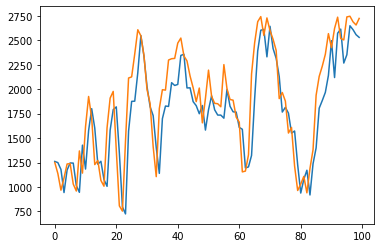

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])
plt.figsize=(12,24)


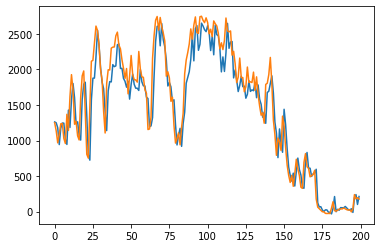

In [ ]:
import matplotlib.pyplot as plt
model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
val_results

plt.plot(val_results['Train Predictions'][:200])
plt.plot(val_results['Actuals'][:200])
plt.figsize=(12,24)

In [ ]:
tf.keras.metrics.Accuracy(
    name='accuracy', dtype=None
)

In [ ]:
model1.compile(optimizer='sgd',
              loss='mse',
              metrics=[tf.keras.metrics.Accuracy()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=60, callbacks=[cp1])

Epoch 1/60
563/563 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/60
563/563 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/60
563/563 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/60
563/563 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/60
563/563 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/60
563/563 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/60
563/563 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0

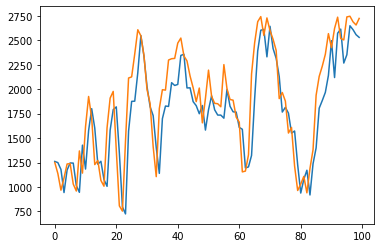

In [ ]:
import matplotlib.pyplot as plt
model1.predict(X_test1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
val_results

plt.plot(val_results['Train Predictions'][:100])
plt.plot(val_results['Actuals'][:100])
plt.figsize=(12,24)

TypeError: ignored